In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import eigvalsh

In [2]:
Z = np.array([[1, 0], [0, -1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
I = np.eye(2, dtype=complex)

In [3]:
def hamiltonian(g0, g1, g2, g3, g4, g5=None, **kwargs):
    H =  g0 * np.kron(I, I)
    H += g1 * np.kron(Z, I)
    H += g2 * np.kron(I, Z)
    H += g3 * np.kron(Z, Z)
    H += g4 * np.kron(X, X) 
    H += (g4 if g5 is None else g5) * np.kron(Y, Y)
    return H

In [4]:
coeffs = pd.read_csv("coefficients.csv", index_col=0)
coeffs2 = pd.read_csv("coefficients_alt.csv", index_col=0)

energies = coeffs[["Exact", "Simulated"]]
coeffs.drop(columns=energies.columns, inplace=True)
energies = energies.reindex(coeffs.index | coeffs2.index)\
                   .rename(columns=lambda x: x + "_1706")

In [5]:
energy_ed = pd.Series(np.zeros(len(coeffs)), index=coeffs.index)
for idx in coeffs.index:
    p = coeffs.loc[idx]
    H = hamiltonian(**p)
    energy_ed[idx] = eigvalsh(H).min()
energies["ED_1706"] = energy_ed

In [6]:
energy_ed = pd.Series(np.zeros(len(coeffs2)), index=coeffs2.index)
for idx in coeffs2.index:
    p = coeffs2.loc[idx]
    H = hamiltonian(**p)
    energy_ed[idx] = eigvalsh(H).min()
energies["ED_1512"] = energy_ed
energies

,Exact_1706,Simulated_1706,ED_1706,ED_1512
R,,,,
0.20,NaN,NaN,NaN,0.144210
0.25,NaN,NaN,NaN,-0.323939
0.30,NaN,NaN,NaN,-0.612975
0.35,NaN,NaN,NaN,-0.800510
0.40,NaN,NaN,NaN,-0.925260
0.45,NaN,NaN,NaN,-1.009009
0.50,NaN,NaN,NaN,-1.065392
0.55,NaN,NaN,NaN,-1.102326
0.60,-0.5617,-0.5703,-0.687590,-1.125594


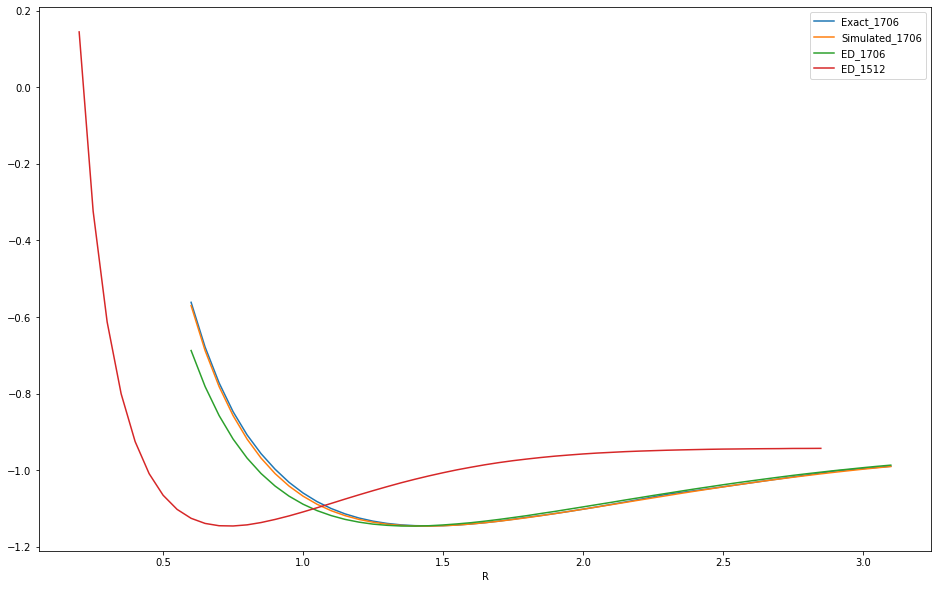

In [7]:
energies.plot(figsize=(16, 10))